<a href="https://colab.research.google.com/github/sonasejidli/Unsupervised-Learning-on-Country-Data/blob/main/Country_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

In [54]:
data = pd.read_csv('Country-data.csv')

In [55]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [56]:
data.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [57]:
label = LabelEncoder()
data['country'] = label.fit_transform(data['country'])

In [58]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [59]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [60]:
column_to_scale = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
                   'inflation', 'life_expec', 'total_fer', 'gdpp']
scaler = StandardScaler()
for colm in column_to_scale:
    data[colm] = scaler.fit_transform(data[colm].values.reshape(-1,1))

In [61]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [62]:
inertia = []
k_range = range(1, 11)

In [63]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=48)
    kmeans.fit(data[column_to_scale])
    inertia.append(kmeans.inertia_)

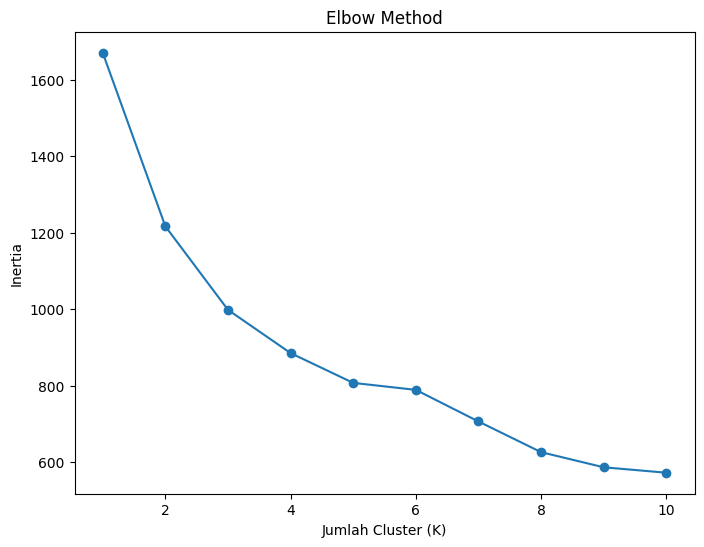

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.show()

In [65]:
data['cluster'] = kmeans.fit_predict(data[column_to_scale])

In [66]:
print(data[['country', 'cluster']].head())

    country  cluster
0 -1.721710        3
1 -1.700967        0
2 -1.680223        0
3 -1.659480        3
4 -1.638736        0


In [67]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,2
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,2
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,2


In [68]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster'],
      dtype='object')

In [69]:
X = data.drop(columns='cluster', axis=1)
y = data['cluster']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [71]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(set(y)), activation='softmax'))
model.add(Dropout(0.1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,114 (12.16 KB)

 Trainable params: 3,114 (12.16 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, epochs=199, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0677 - loss: 3.6270 - val_accuracy: 0.1471 - val_loss: 2.3310
Epoch 2/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0673 - loss: 3.7911 - val_accuracy: 0.2059 - val_loss: 2.2021
Epoch 3/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1642 - loss: 3.8227 - val_accuracy: 0.2941 - val_loss: 2.0920
Epoch 4/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2878 - loss: 3.8688 - val_accuracy: 0.3824 - val_loss: 1.9851
Epoch 5/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3523 - loss: 2.6148 - val_accuracy: 0.4412 - val_loss: 1.8752
Epoch 6/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5316 - loss: 3.8599 - val_accuracy: 0.4118 - val_loss: 1.7646
Epoch 7/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5452 - loss: 3.4579 - val_accuracy: 0.4412 - val_loss: 1.6574
Epoch 8/199
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6808 - loss: 2.7205 - val_accuracy: 0.5294 - val_loss: 1.5504

In [75]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7702 - loss: 1.0522 
Test Accuracy: 76.47%


Pca Tətbiqi


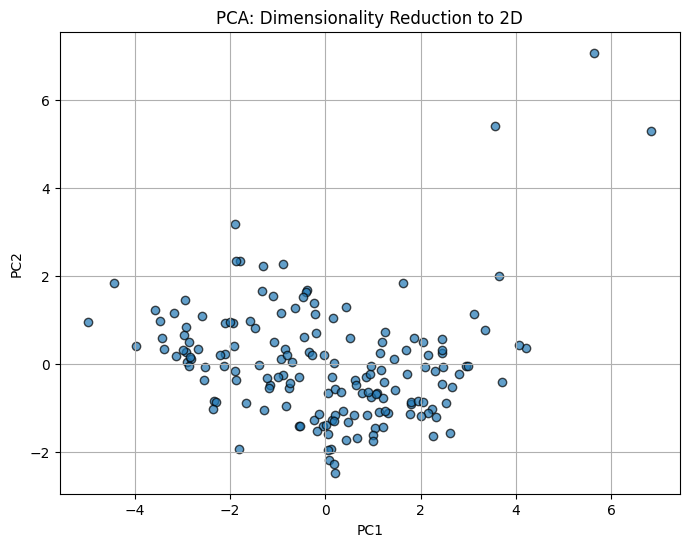

In [76]:
from sklearn.decomposition import PCA

data_features = data.drop(['country'], axis = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_features)

# PCA Tetbiqi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# PCA nəticəsini Dataframe ə çeviririk
pca_df = pd.DataFrame(data=reduced_data, columns=['PC1','PC2'])

# PCA nəticələrinin vizuallaşdırılması
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolor='k')
plt.title('PCA: Dimensionality Reduction to 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

KMeansin yoxlanilmasi ELbow Method

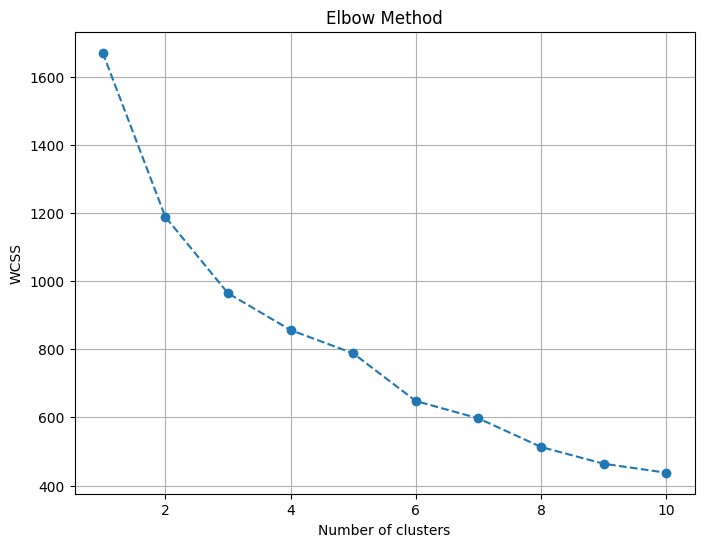

In [77]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, random_state=48)
  kmeans.fit(scaled_features)
  wcss.append(kmeans.inertia_)

# Elbow vizuallasdirilmasi

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker="o",linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()



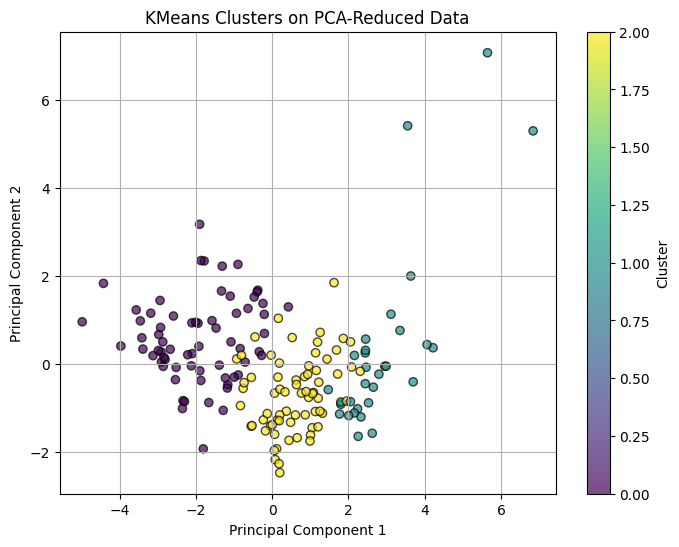

In [78]:
# KMeans ilə klasterləşmə
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Klasterləri PCA nəticələrində göstəririk
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['Cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.title('KMeans Clusters on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [79]:
from sklearn.metrics import silhouette_score

# Klasterlərin performansını ölçürük
sil_score = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score for KMeans: {sil_score}')


Silhouette Score for KMeans: 0.27475204439132095
